In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1 : discover our data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Userbase.csv')
data

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
data.shape

(2500, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [ ]:
data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

## Step 2 : Clean the data

In [ ]:
data.columns=['User_ID', 'Subscription_Type', 'Monthly_Revenue', 'Join_Date',
       'Last_Payment_Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration']

In [ ]:
#data['Join_Date'] = pd.to_datetime(data['Join_Date'], format="%d/%m/%y") didn't work because 22 values remain unconverted
# let's check if there are dates that are different than others
length=data.Join_Date.str.len().value_counts()
length

8    2500
Name: Join_Date, dtype: int64

#### all dates have the same shape so we will extract the date in another way

In [ ]:
data[['Join_Day','Join_Month', 'Join_Year']] = data.Join_Date.str.split('-', expand=True)
data[['Last_Day','Last_Month', 'Last_Year']] = data.Last_Payment_Date.str.split('-', expand=True)

In [ ]:
for column in ['Join_Day','Join_Month','Join_Year','Last_Day','Last_Month','Last_Year'] :
    data[column]=data[column].astype('int64')

In [ ]:
data.drop_duplicates().shape

(2500, 16)

## Step 2 : Data Visualisation

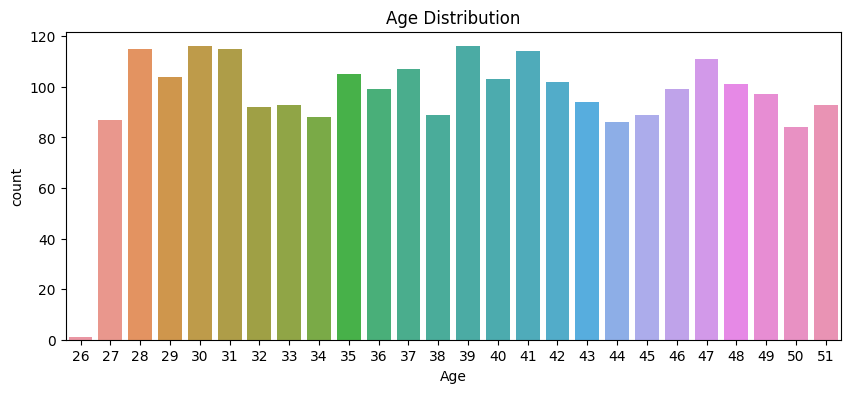

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data,x='Age')
plt.title('Age Distribution')
plt.show()

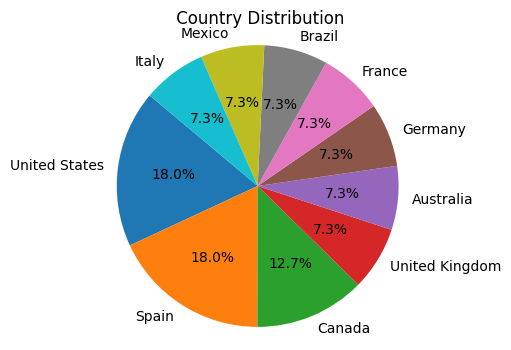

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(data['Country'].value_counts(),labels=data['Country'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title(' Country Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

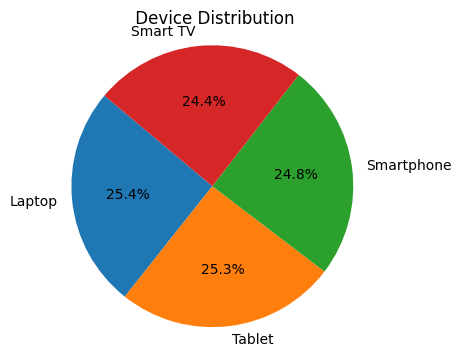

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(data['Device'].value_counts(),labels=data['Device'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title(' Device Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

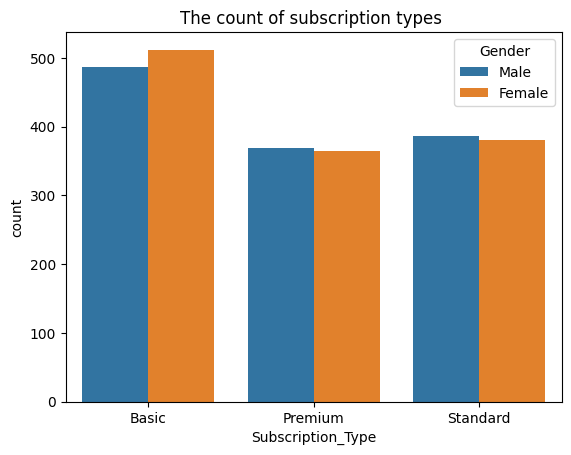

In [ ]:
sns.countplot(data=data,x='Subscription_Type',hue='Gender')
plt.title('The count of subscription types ')
plt.show()

In [ ]:
data.columns


Index(['User_ID', 'Subscription_Type', 'Monthly_Revenue', 'Join_Date',
       'Last_Payment_Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Join_Day', 'Join_Month', 'Join_Year', 'Last_Day',
       'Last_Month', 'Last_Year'],
      dtype='object')

<Axes: ylabel='Frequency'>

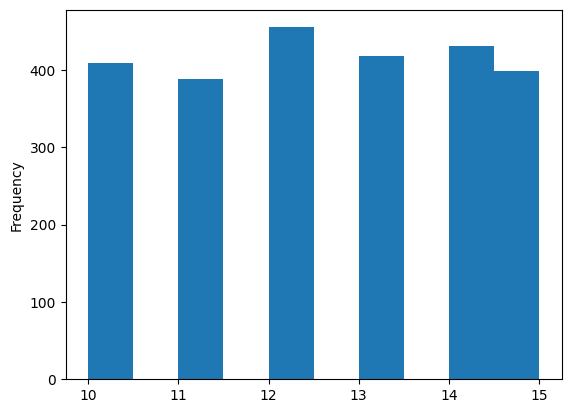

In [ ]:
data['Monthly_Revenue'].plot(kind="hist")

<Axes: >

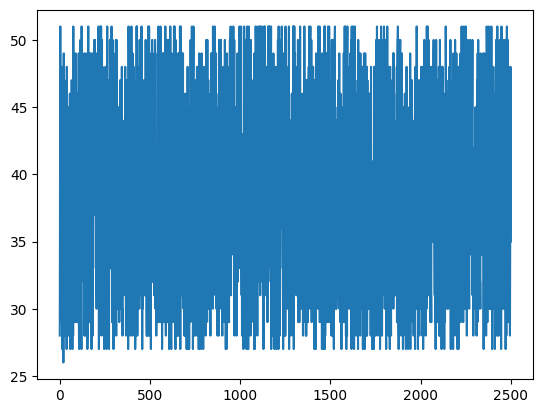

In [ ]:
data['Age'].plot(kind="line")

{'whiskers': [<matplotlib.lines.Line2D at 0x79dda981f880>,
 'caps': [<matplotlib.lines.Line2D at 0x79dda98411e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79dda9840b20>],
 'medians': [<matplotlib.lines.Line2D at 0x79dda9841720>],
 'fliers': [<matplotlib.lines.Line2D at 0x79dda98419c0>],
 'means': []}

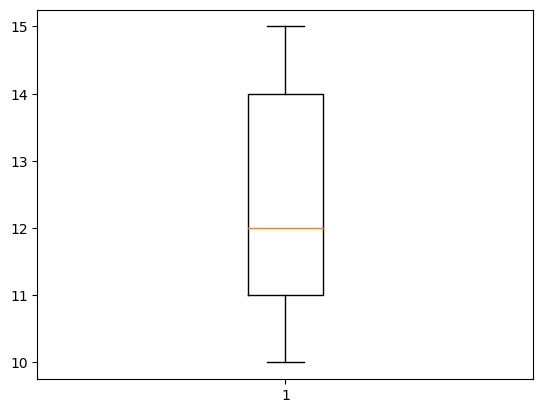

In [ ]:
plt.boxplot(data["Monthly_Revenue"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x79dda989b8e0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x79dda9aa6140>,
 'cmins': <matplotlib.collections.LineCollection at 0x79dda989bd90>,
 'cbars': <matplotlib.collections.LineCollection at 0x79dda96d4130>}

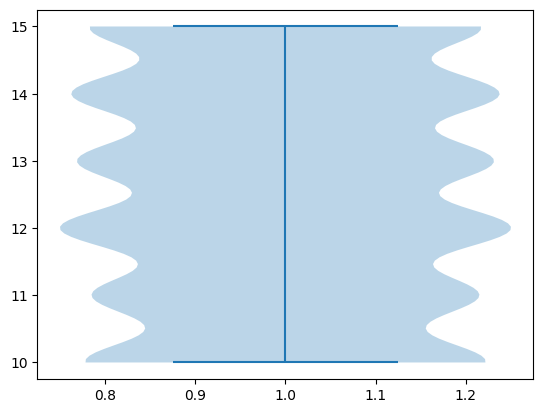

In [ ]:
plt.violinplot(data["Monthly_Revenue"])

<Axes: xlabel='Age', ylabel='count'>

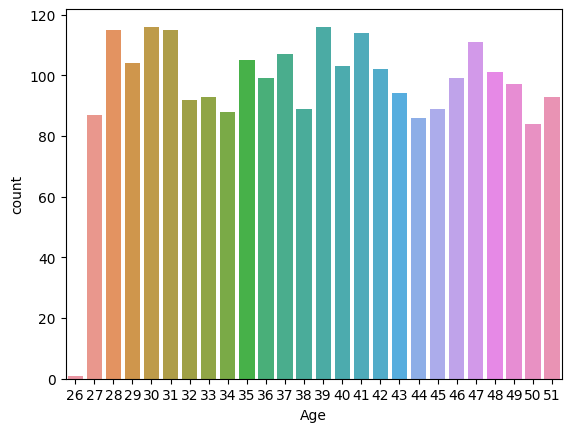

In [ ]:
sns.countplot(x='Age',data=data)

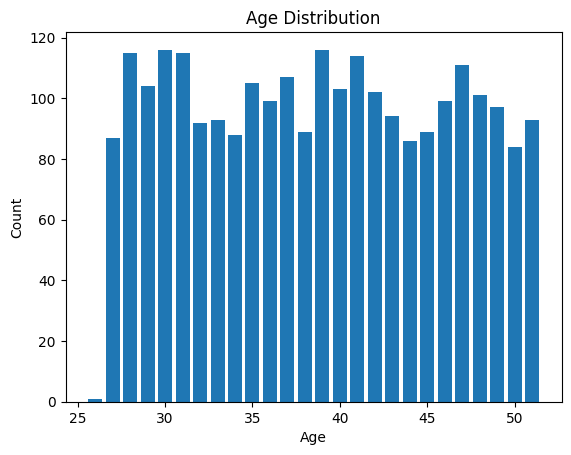

In [ ]:
gender_counts = data['Age'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'BP Distribution')

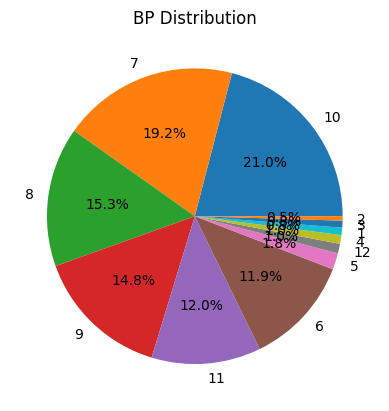

In [ ]:
dependents = data['Join_Month'].value_counts()
plt.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%')
plt.title("BP Distribution")

<ipython-input-26-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

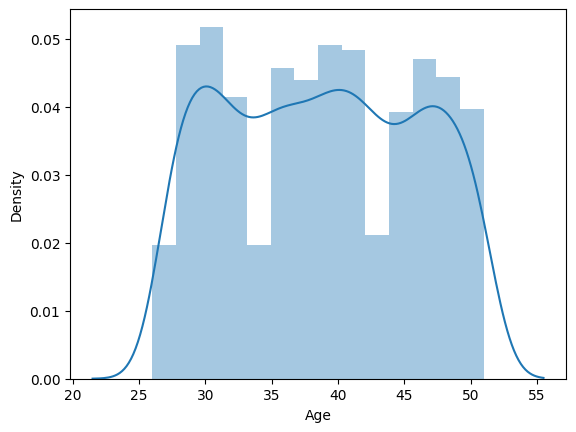

In [ ]:
sns.distplot(data['Age'])

<ipython-input-27-c3735d51af64>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True, color="r")


<Axes: xlabel='Age', ylabel='Density'>

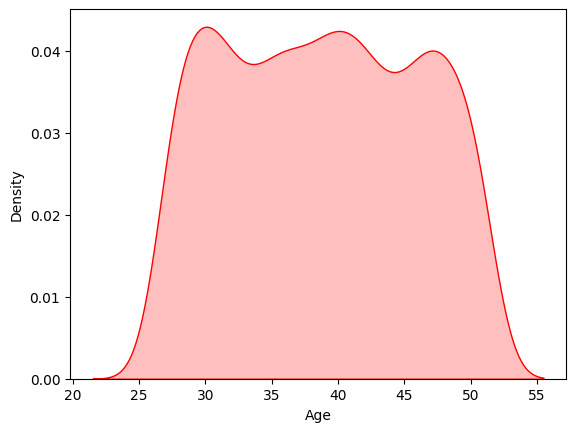

In [ ]:
sns.kdeplot(data['Age'], shade=True, color="r")

<Axes: xlabel='Age', ylabel='Gender'>

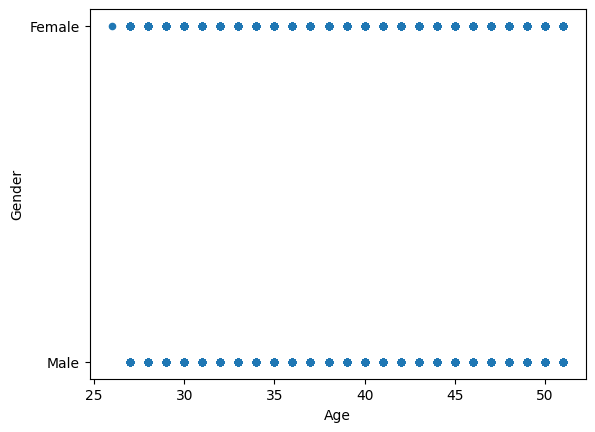

In [ ]:
var = 'Age'
data = pd.concat([data['Gender'], data[var]], axis=1)
data.plot.scatter(x=var, y='Gender')


Text(0.5, 0.98, 'Joint Plot of Age & Gender')

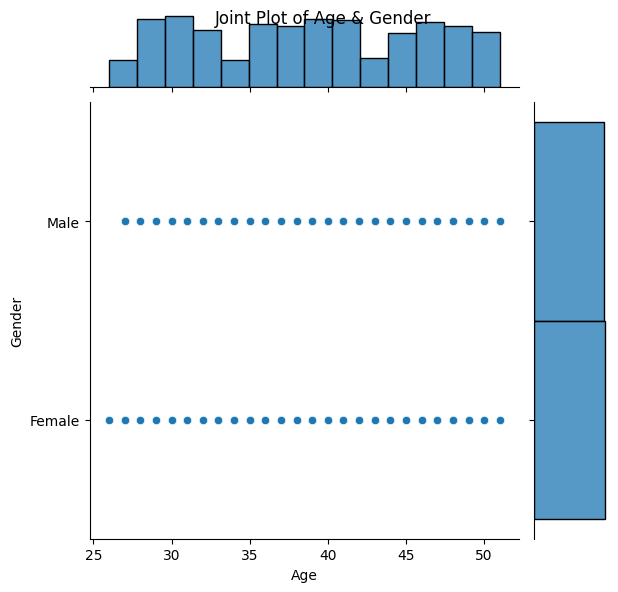

In [ ]:
sns.jointplot(data,x="Age",y="Gender",kind="scatter")
plt.suptitle("Joint Plot of Age & Gender")

In [56]:
s=sns.pairplot(data,hue='Gender',height=3,diag_kind='hist')
s.savefig("Output.png")

ValueError: ignored

<ipython-input-34-bb488994d248>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr(method='spearman')


<Axes: >

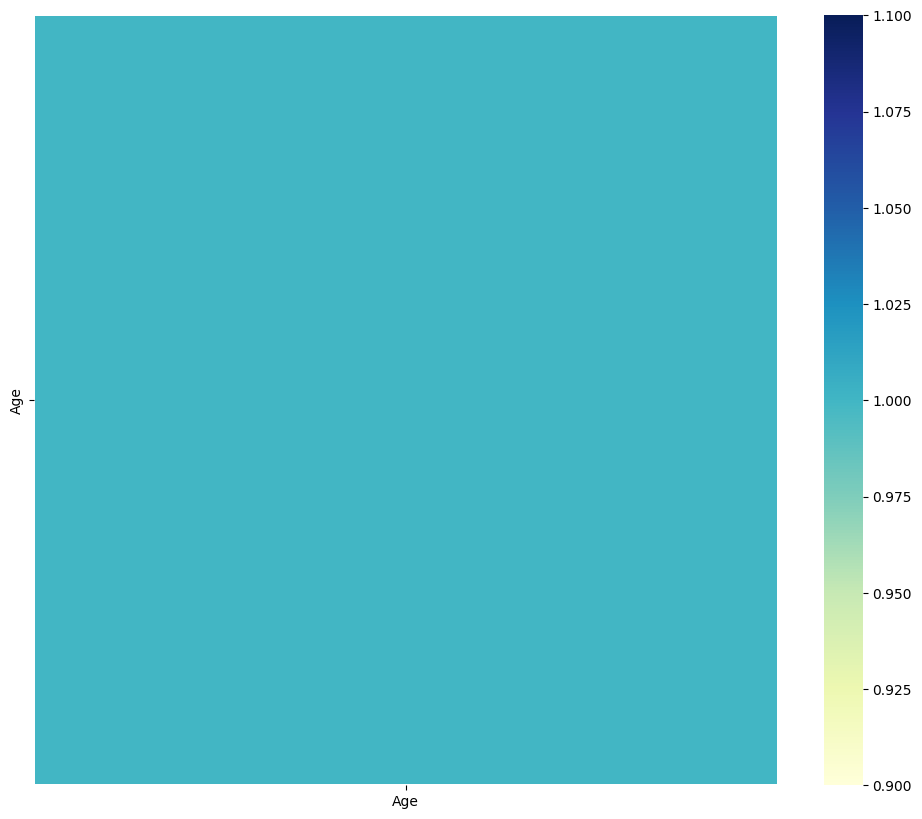

In [ ]:
corrmat = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  2500 non-null   object
 1   Age     2500 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.2+ KB
